In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# set figure size
sns.set(rc={'figure.figsize':(14,10)})

### State Data EDA

In [78]:
state_temperatures = pd.read_csv('cleaned_temperature_data_States.csv')

state_temperatures.head()   

,month,year,state,average_temp,average_historic,longitude,latitude,net_difference
0,1,1950,Alabama,53.8,45.9,-86.828372,32.789832,7.9
1,2,1950,Alabama,56.0,46.5,-86.828372,32.789832,9.5
2,3,1950,Alabama,52.7,51.6,-86.828372,32.789832,1.1
3,4,1950,Alabama,55.7,59.0,-86.828372,32.789832,-3.3
4,5,1950,Alabama,66.4,66.7,-86.828372,32.789832,-0.3


The data has already been cleaned to a decent degree, so there should not be any nulls. However, we can still check.

In [79]:
state_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41856 entries, 0 to 41855
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             41856 non-null  int64  
 1   year              41856 non-null  int64  
 2   state             41856 non-null  object 
 3   average_temp      41856 non-null  float64
 4   average_historic  41856 non-null  float64
 5   longitude         41856 non-null  float64
 6   latitude          41856 non-null  float64
 7   net_difference    41856 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.6+ MB


In the following cell we use the .describe method on our data. Using this we can start to build some interesting relationships between the data, particularly the temperature columns. Here we can see that the average temperature is rough 0.6 degrees higher than the historical average. Additionally, you will find that the min and the max are both higher magnitude than the historical average. This makes intuitive sense, one of these columns measures averages across 100 years, while the other measures across 1. One final thing of interest is the information given by the percentiles of the net difference column. The 50 percentile net difference is 0.5. This means that more than half the data has net differences above 0.5.

In [80]:
state_temperatures.describe()

,month,year,average_temp,average_historic,longitude,latitude,net_difference
count,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000
mean,6.481651,1985.834862,51.970468,51.398815,-91.284252,39.508564,0.571653
std,3.448500,20.977964,17.127178,17.158828,14.692681,4.630835,2.583779
min,1.000000,1950.000000,-2.800000,9.100000,-120.555413,28.628439,-12.600000
25%,3.000000,1968.000000,38.600000,37.900000,-100.290211,35.778112,-1.000000
50%,6.000000,1986.000000,53.100000,52.500000,-89.431805,39.632189,0.500000
75%,9.000000,2004.000000,66.200000,65.900000,-79.232348,43.171139,2.100000
max,12.000000,2022.000000,88.400000,82.100000,-69.226647,47.446339,13.800000


The following histogram looks at the distributions of net differences. This distribution appears centered roughly around 0 with slighlty more data falling into the positive bins compared to the negative bins.

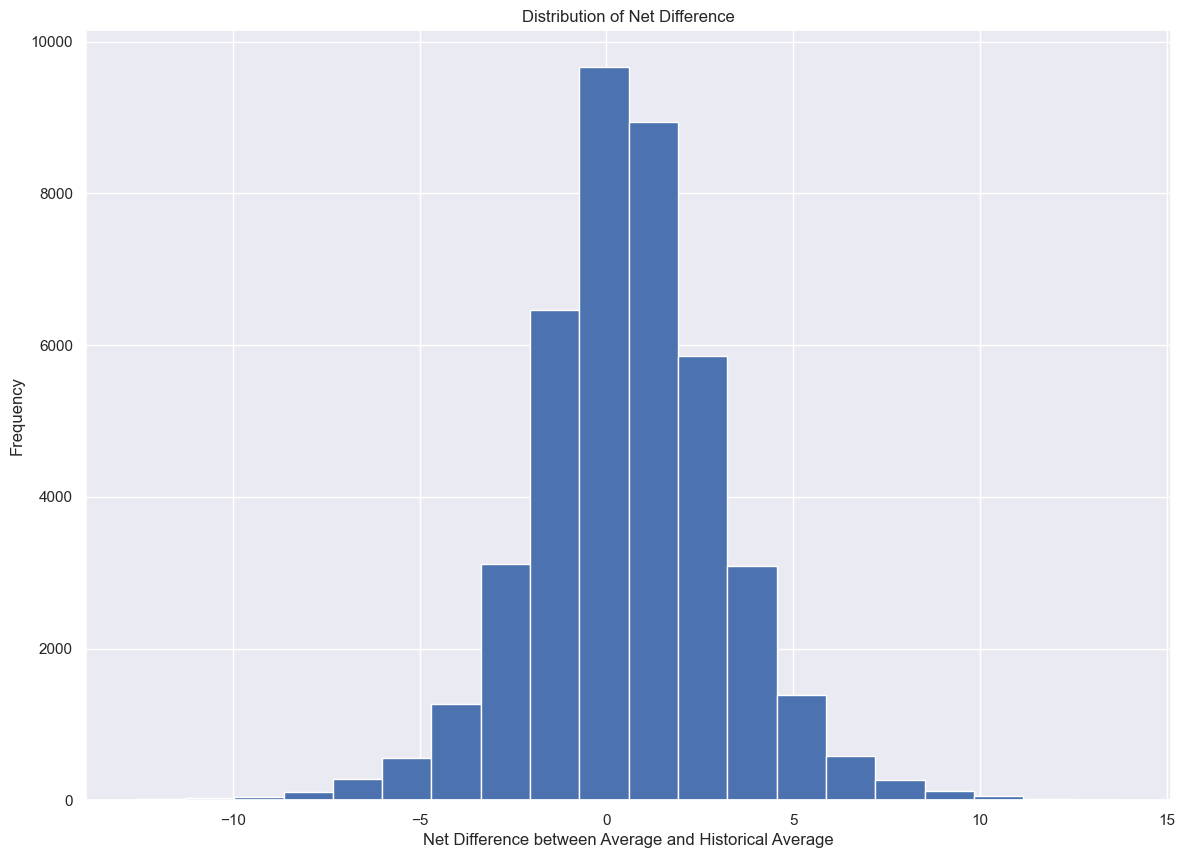

In [81]:
plt.hist(state_temperatures["net_difference"], bins = 20)
plt.title("Distribution of Net Difference")
plt.xlabel("Net Difference between Average and Historical Average")
plt.ylabel("Frequency");

Here is an example of a graph we could make down the line. We could pick a state and a time frame and show how the temperatures behaved in that state. This example shows texas from 1996-2022. Notice there is an upward trend, this is common among all the data.

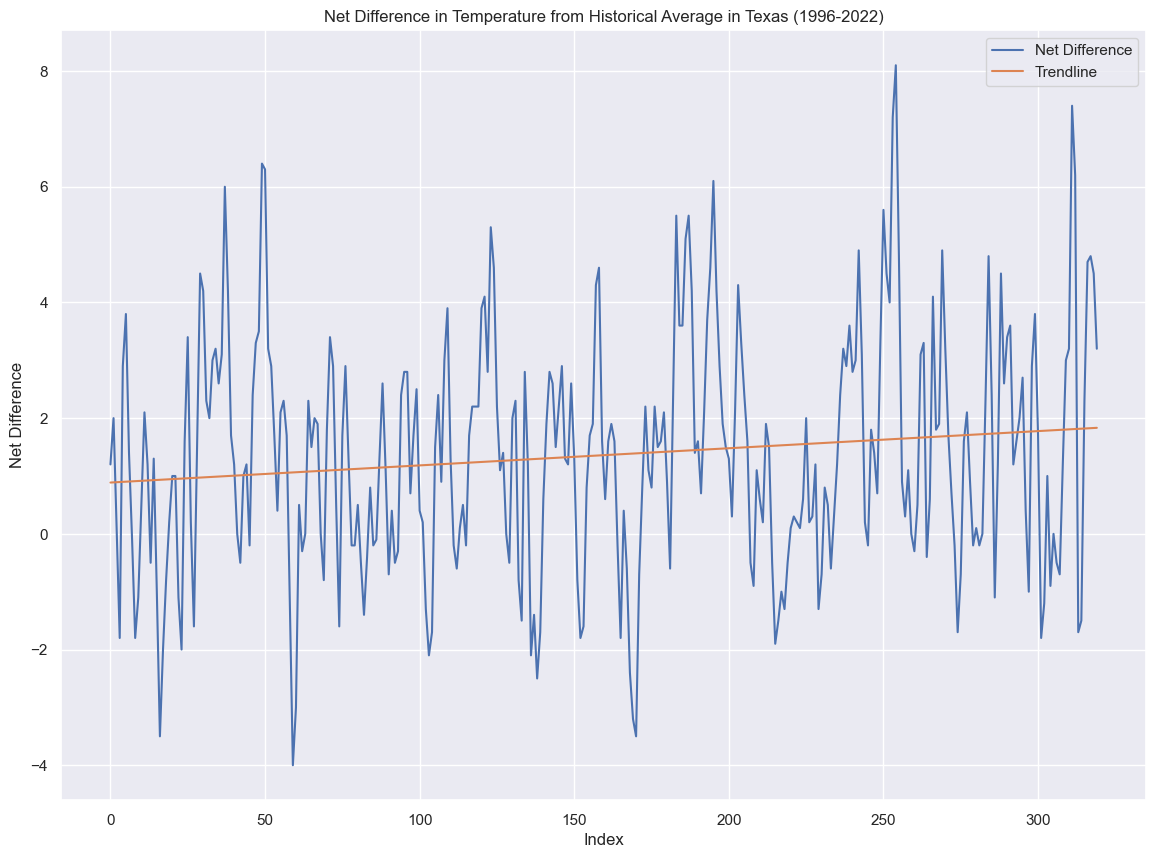

In [82]:
# Example State temp plots
# Set your own timeframe or state
state = "Texas"
start_year = 1996

state_df = state_temperatures[state_temperatures["state"] == state]
state_df = state_df[state_df["year"] >= start_year]
state_df.reset_index(inplace=True)

plt.plot(state_df["net_difference"])
plt.title(f"Net Difference in Temperature from Historical Average in {state} ({start_year}-2022)")
plt.xlabel("Index")
plt.ylabel("Net Difference")

z = np.polyfit(state_df.index, state_df["net_difference"], 1)
p = np.poly1d(z)

plt.plot(state_df.index, p(state_df.index))

plt.legend(["Net Difference", "Trendline"]);

Then I decided to graph histograms of both the historical averages and the average temperatures to see how they differ. Additionally, we added some distribution lines to highlight these differences. Overall, the historical data looks more randomly distributed, while the average data contains more temperatures in the 60+ range.

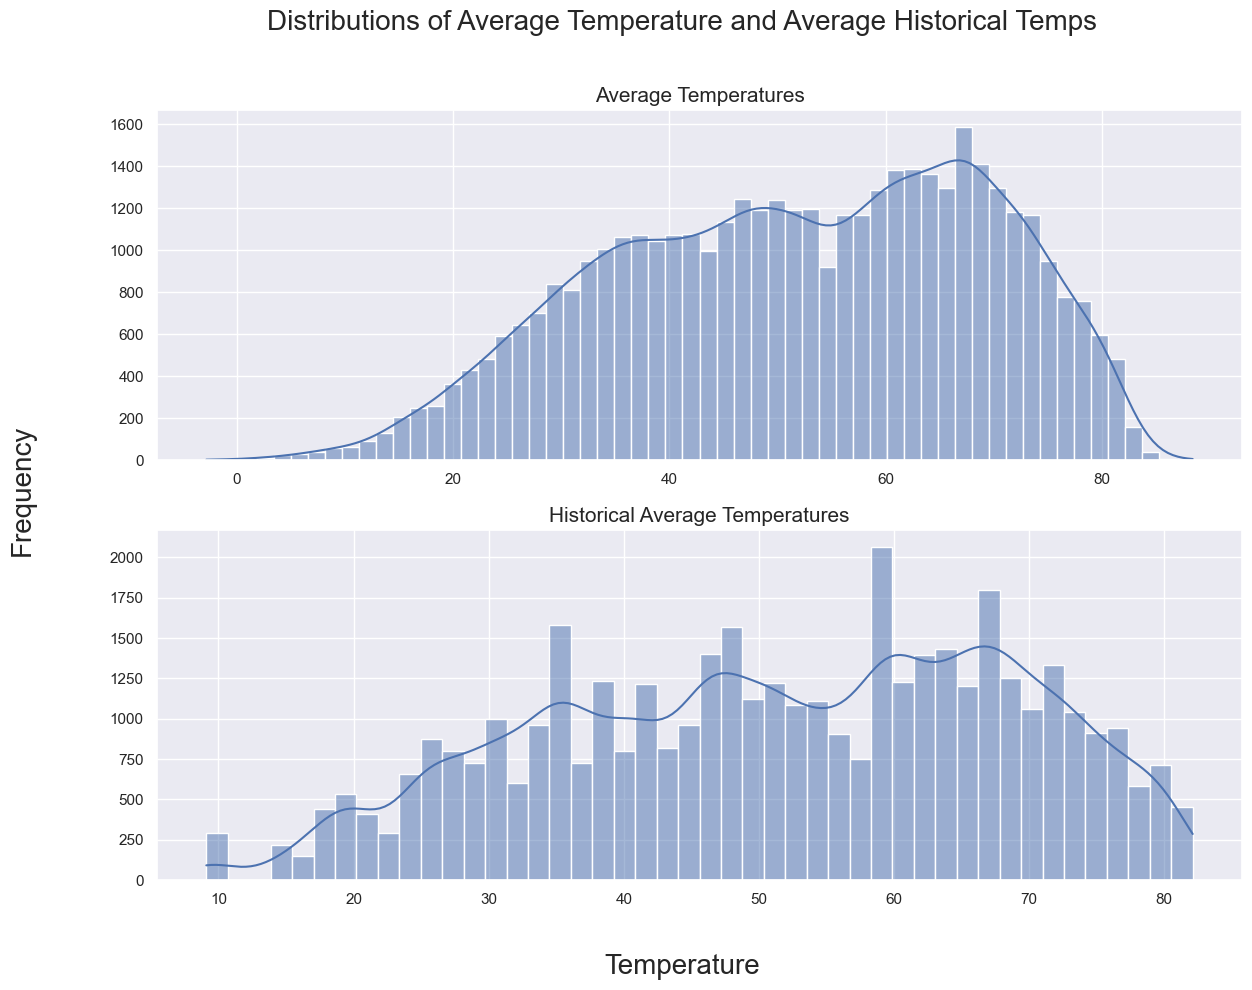

In [83]:
fig, axes = plt.subplots(2)
#create chart in each subplot
sns.histplot(state_temperatures["average_temp"], ax=axes[0], kde=True)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("Average Temperatures", fontsize = 15)
sns.histplot(state_temperatures["average_historic"], ax=axes[1], kde=True)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_title("Historical Average Temperatures", fontsize = 15)
fig.suptitle("Distributions of Average Temperature and Average Historical Temps", fontsize =20)
fig.supxlabel("Temperature", fontsize =20)
fig.supylabel("Frequency", fontsize =20);



The final step was creating a correlation heatmap to try and find some other relationships in the data. Overall it looks like the most correlated features are average_historic and month as well as average_temp and month. Additionally, year and net_difference are also more correlated than the other columns. All of these relationships make sense and can be explained by the idea of seasonality in time series data. There are common cycles when it comes to looking at temperatures over a year like the winter months are colder and the summer is warmer. These correlations can be explained by those cycles.

The last thing to not is that the latitude was also found to negatively correlate with both of the temperature columns. This also makes sense as latitude increase (move north), generally the colder it gets. (i.e. Wisconsin is generally colder than Texas.)

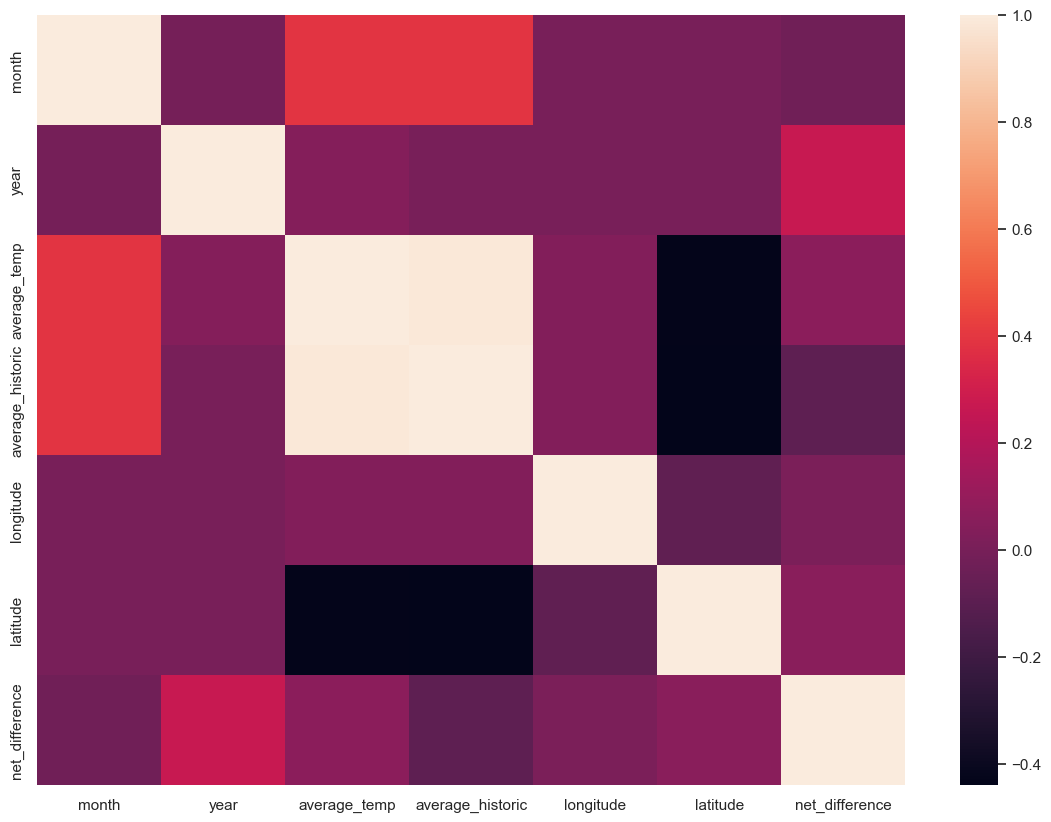

In [84]:
sns.heatmap(state_temperatures.corr());

### US Data EDA

In [85]:
us_temperatures = pd.read_csv('cleaned_temperature_data_US.csv')

us_temperatures.head()  

,month,year,average_temp,average_historic,net_difference
0,1.0,1950.0,33.052083,30.556250,2.495833
1,2.0,1950.0,32.939583,30.572917,2.366667
2,3.0,1950.0,35.216667,36.264583,-1.047917
3,4.0,1950.0,42.222917,45.387500,-3.164583
4,5.0,1950.0,53.454167,55.197917,-1.743750


Again the data should be non null, but it does not hurt to check.

In [86]:
us_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             872 non-null    float64
 1   year              872 non-null    float64
 2   average_temp      872 non-null    float64
 3   average_historic  872 non-null    float64
 4   net_difference    872 non-null    float64
dtypes: float64(5)
memory usage: 34.2 KB


Below, I repeated the same EDA steps on the overall US dataset. Many of the findings were similar, however the key difference between the two datasets is another level of aggregation. This is noticeable when looking into the historic averages histogram for the us data. There are some bins that have no entries. This is because all of the data is aggregated in a way such that there are only 12 unique values in that column. This means that some bins have no entries and skew the distribution slightly.

In [87]:
us_temperatures.describe()

,month,year,average_temp,average_historic,net_difference
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,6.481651,1985.834862,51.970468,51.398815,0.571653
std,3.450437,20.989753,14.949063,14.995655,1.783145
min,1.000000,1950.000000,23.902083,30.539583,-6.679167
25%,3.000000,1968.000000,37.424479,36.274479,-0.540104
50%,6.000000,1986.000000,52.322917,51.409375,0.447917
75%,9.000000,2004.000000,66.515104,65.153646,1.648438
max,12.000000,2022.000000,75.037500,72.391667,7.510417


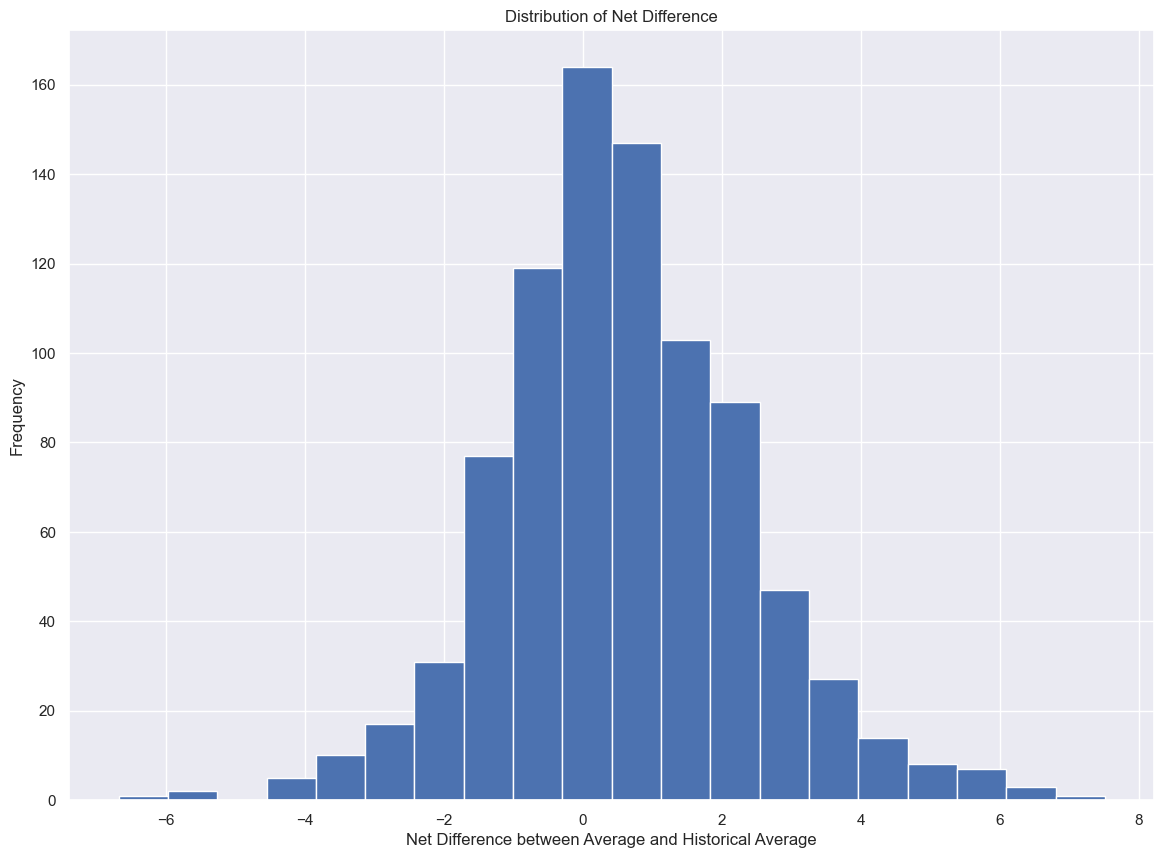

In [88]:
plt.hist(us_temperatures["net_difference"], bins = 20)
plt.title("Distribution of Net Difference")
plt.xlabel("Net Difference between Average and Historical Average")
plt.ylabel("Frequency");

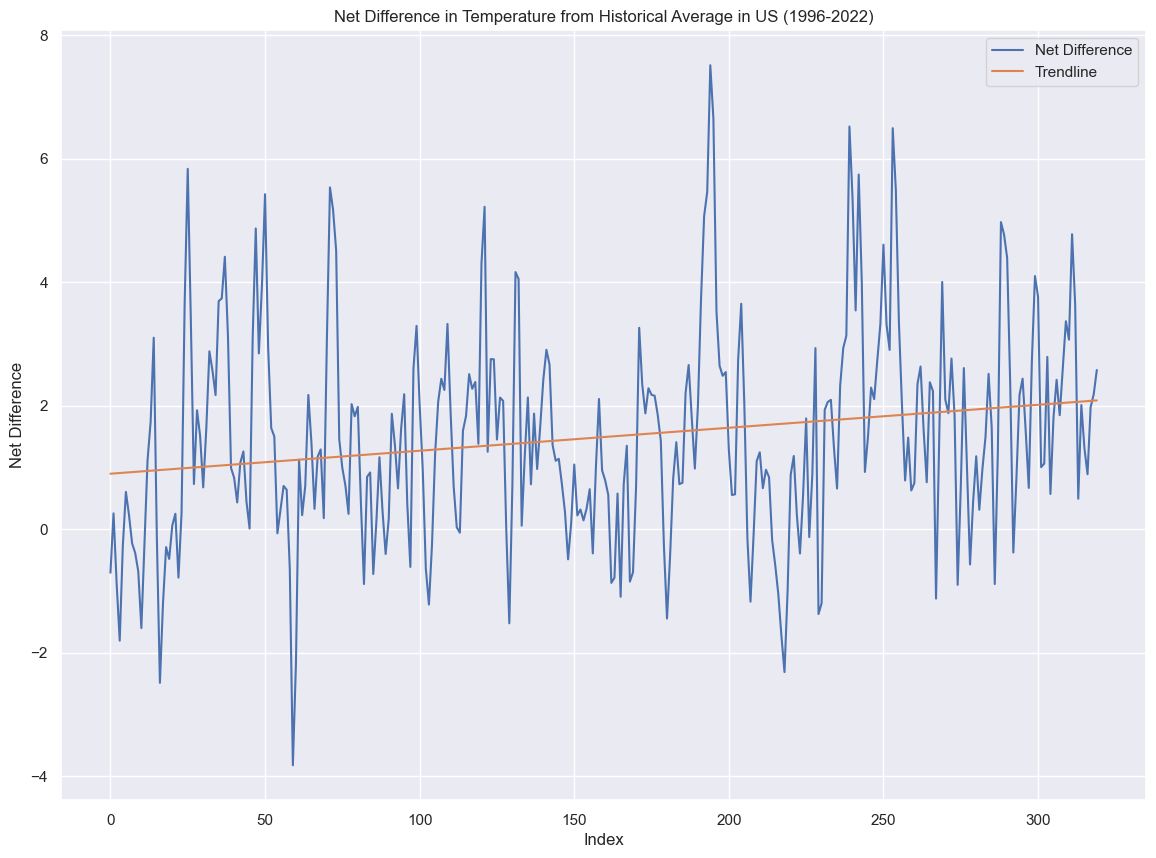

In [89]:
start_year = 1996

us_df = us_temperatures[us_temperatures["year"] >= start_year]
us_df.reset_index(inplace=True)

plt.plot(us_df["net_difference"])
plt.title(f"Net Difference in Temperature from Historical Average in US ({start_year}-2022)")
plt.xlabel("Index")
plt.ylabel("Net Difference")

z = np.polyfit(us_df.index, us_df["net_difference"], 1)
p = np.poly1d(z)

plt.plot(us_df.index, p(us_df.index))

plt.legend(["Net Difference", "Trendline"]);

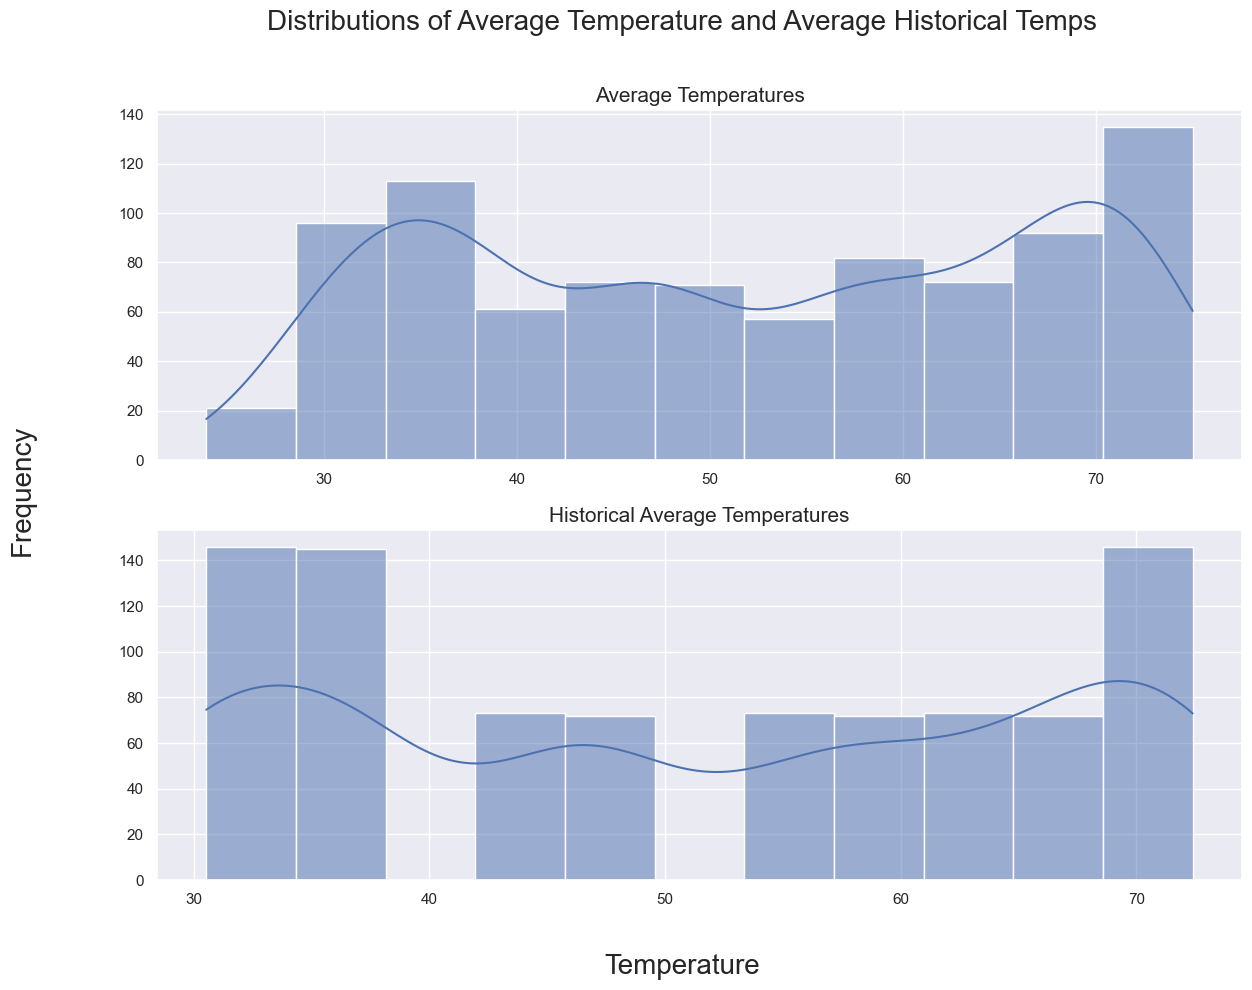

In [90]:
fig, axes = plt.subplots(2)
#create chart in each subplot
sns.histplot(us_temperatures["average_temp"], ax=axes[0], kde=True)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("Average Temperatures", fontsize = 15)
sns.histplot(us_temperatures["average_historic"], ax=axes[1], kde=True)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_title("Historical Average Temperatures", fontsize = 15)
fig.suptitle("Distributions of Average Temperature and Average Historical Temps", fontsize =20)
fig.supxlabel("Temperature", fontsize =20)
fig.supylabel("Frequency", fontsize =20);


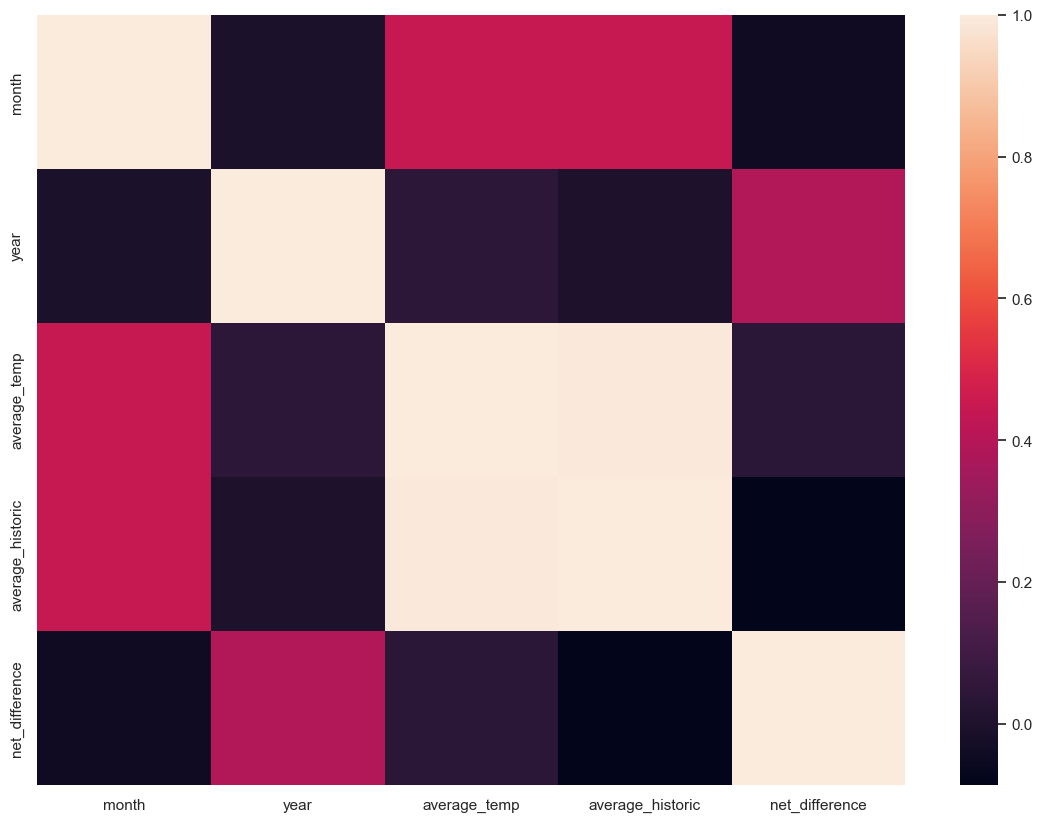

In [91]:
sns.heatmap(us_temperatures.corr());